데이터 로드 완료. Shape: (10000, 15)
Index(['user_id', 'subscription_duration', 'recent_login_time',
       'average_login_time', 'average_time_per_learning_session',
       'monthly_active_learning_days', 'total_completed_courses',
       'recent_learning_achievement', 'abandoned_learning_sessions',
       'community_engagement_level', 'preferred_difficulty_level',
       'subscription_type', 'customer_inquiry_history', 'payment_pattern',
       'target'],
      dtype='object')
user_id                               object
subscription_duration                  int64
recent_login_time                      int64
average_login_time                   float64
average_time_per_learning_session    float64
monthly_active_learning_days           int64
total_completed_courses                int64
recent_learning_achievement          float64
abandoned_learning_sessions            int64
community_engagement_level             int64
preferred_difficulty_level            object
subscription_type           

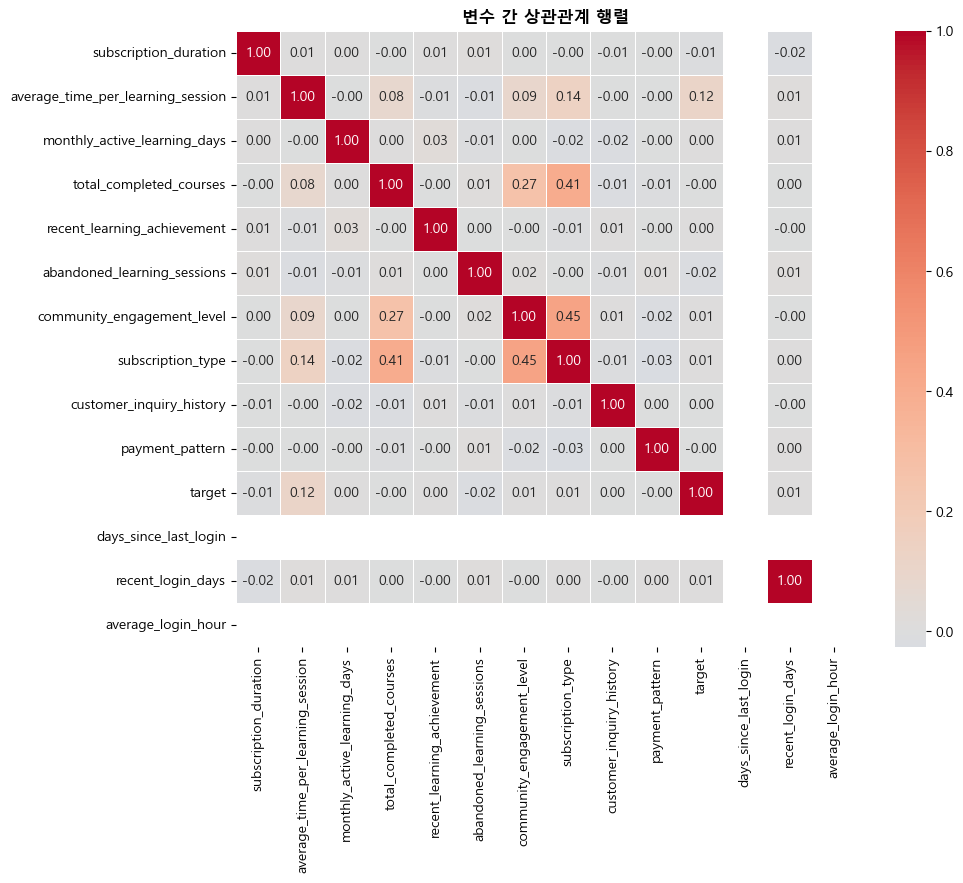

상관관계 행렬 플롯 완료


In [16]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import matplotlib.font_manager as fm

def load_and_preprocess_data(file_path):
    try:
        df = pd.read_csv(file_path, sep=',')
        print("데이터 로드 완료. Shape:", df.shape)
        print(df.columns)
        print(df.dtypes)
        
        # 결측치 처리
        numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
        df[numeric_cols] = SimpleImputer(strategy='median').fit_transform(df[numeric_cols])
        print("결측치 처리 완료")
        print(df.isnull().sum())
        
        # 스케일링
        scaler = StandardScaler()
        scaled_cols = ['subscription_duration', 'average_time_per_learning_session', 'monthly_active_learning_days']
        df[scaled_cols] = scaler.fit_transform(df[scaled_cols])
        print("스케일링 완료")
        print(df[scaled_cols].describe())
        
        # Label Encoding
        df['subscription_type'] = LabelEncoder().fit_transform(df['subscription_type'])
        print("Label Encoding 완료")
        print(df['subscription_type'].value_counts())
        
        # 날짜/시간 처리
        df['recent_login_time'] = pd.to_datetime(df['recent_login_time'], errors='coerce')
        df['average_login_time'] = pd.to_datetime(df['average_login_time'], errors='coerce')
        now = pd.Timestamp.now()
        df['days_since_last_login'] = (now - df['recent_login_time']).dt.days
        df['recent_login_days'] = (now - df['recent_login_time']).dt.total_seconds() / (24 * 60 * 60)
        df['average_login_hour'] = df['average_login_time'].dt.hour + df['average_login_time'].dt.minute / 60
        print("날짜/시간 처리 완료")
        print(df[['days_since_last_login', 'recent_login_days', 'average_login_hour']].describe())
        
        return df
    except Exception as e:
        print(f"데이터 로드 및 전처리 중 오류 발생: {str(e)}")
        return None

def prepare_model_data(df):
    try:
        X = df.drop(['target', 'recent_login_time', 'average_login_time'], axis=1)
        y = df['target']
        X = pd.get_dummies(X, columns=['preferred_difficulty_level', 'subscription_type'], drop_first=True)
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
        print("데이터 분할 완료")
        print("X_train shape:", X_train.shape)
        print("X_test shape:", X_test.shape)
        return X_train, X_test, y_train, y_test
    except Exception as e:
        print(f"모델 데이터 준비 중 오류 발생: {str(e)}")
        return None, None, None, None

def train_and_evaluate_model(X_train, X_test, y_train, y_test):
    try:
        scaler = StandardScaler()
        X_train_scaled = scaler.fit_transform(X_train)
        X_test_scaled = scaler.transform(X_test)
        
        model = LogisticRegression(class_weight='balanced', max_iter=1000)
        model.fit(X_train_scaled, y_train)
        print("모델 학습 완료")
        
        y_pred = model.predict(X_test_scaled)
        print("혼동 행렬:")
        print(confusion_matrix(y_test, y_pred))
        print("\n분류 보고서:")
        print(classification_report(y_test, y_pred))
    except Exception as e:
        print(f"모델 학습 및 평가 중 오류 발생: {str(e)}")

def plot_correlation_matrix(df):
    try:
        numeric_df = df.select_dtypes(include=['float64', 'int64', 'int32', 'int8'])
        corr = numeric_df.corr()
        plt.figure(figsize=(10, 8))
        sns.heatmap(corr, annot=True, cmap='coolwarm', center=0, fmt=".2f", linewidths=0.5)
        plt.title("변수 간 상관관계 행렬", fontsize=12, fontweight='bold')
        plt.show()
        print("상관관계 행렬 플롯 완료")
    except Exception as e:
        print(f"상관관계 행렬 플롯 중 오류 발생: {str(e)}")

# 메인 실행 부분
if __name__ == "__main__":
    file_path = 'C:\\workspace\\WASSUP4\\data\\mini.csv'
    df = load_and_preprocess_data(file_path)
    if df is not None:
        X_train, X_test, y_train, y_test = prepare_model_data(df)
        if X_train is not None:
            train_and_evaluate_model(X_train, X_test, y_train, y_test)
            plot_correlation_matrix(df)
            # 여기에 다른 시각화 함수들을 추가할 수 있습니다.
    else:
        print("데이터 로드에 실패했습니다. 프로그램을 종료합니다.")